https://www.kaggle.com/aungpyaeap/supermarket-sales#supermarket_sales%20-%20Sheet1.csv

### Context
#### The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

### Attribute information
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in Dolar
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#### Acknowledgements
#### Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

#### Purpose
#### This dataset can be used for predictive data analytics purpose.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from platform import python_version

print(python_version())

3.6.9


In [3]:
data = pd.read_csv("Datas/supermarket-sales/supermarket_sales - Sheet1.csv",
                  parse_dates=['Date'])

# id da compra dispensaveel
data = data.drop('Invoice ID', axis = 1)

# hora da compra dispensaveel
data = data.drop('Time', axis = 1)

# branch=city | Branch dispensaveel
data = data.drop('Branch', axis = 1)

data.tail()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1
999,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,Cash,618.38,4.761905,30.9190,6.6


In [4]:
data.count()

City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Payment                  1000 non-null   object        
 10  cogs                     1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
data.describe(include='O')

,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000
unique,3,2,2,6,3
top,Yangon,Member,Female,Fashion accessories,Ewallet
freq,340,501,501,178,345


#### Functions to make bar chart for each proposing correlation

In [8]:
def bar(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

def bar3(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    value_3 = [np.array(dataframe)[2][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2,
                       str(np.array(dataframe)[2][0]): value_3}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

##### Some graphs relation

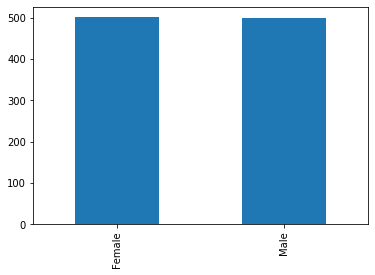

In [9]:
data['Gender'].value_counts().plot(kind='bar');

In [10]:
data_gender_rating = data.groupby('Gender', as_index=False).Rating.mean()
data_gender_rating

,Gender,Rating
0,Female,6.964471
1,Male,6.980962


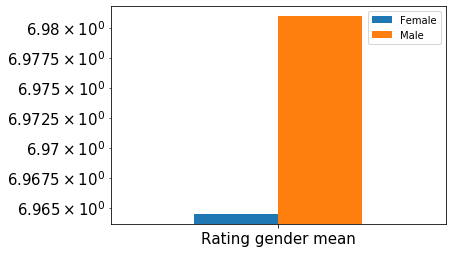

In [11]:
bar("Rating gender mean", data_gender_rating, True)

In [12]:
data_customertype_rating = data.groupby('Customer type', as_index=False).Rating.mean()
data_customertype_rating

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


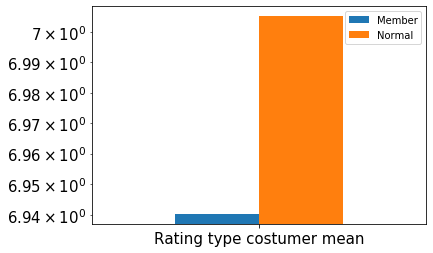

In [13]:
bar("Rating type costumer mean", data_customertype_rating, True)

In [14]:
data_gender_quantity = data.groupby('Gender', as_index=False).Quantity.count()
data_gender_quantity

,Gender,Quantity
0,Female,501
1,Male,499


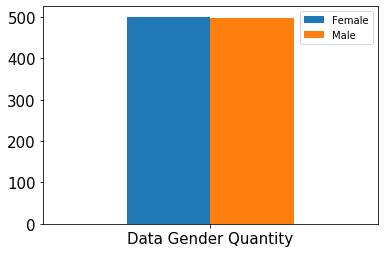

In [15]:
bar("Data Gender Quantity", data_gender_quantity, False)

In [16]:
data_qtt_paymnt = data.groupby('Payment', as_index=False).Quantity.count()
data_qtt_paymnt

,Payment,Quantity
0,Cash,344
1,Credit card,311
2,Ewallet,345


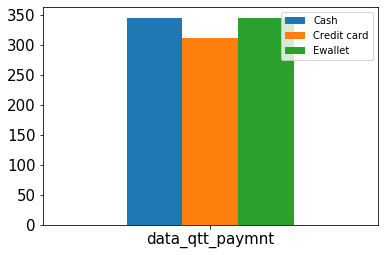

In [17]:
bar3("data_qtt_paymnt", data_qtt_paymnt, False)

In [18]:
data_qtt_city = data.groupby('City', as_index=False).Quantity.count()
data_qtt_city

,City,Quantity
0,Mandalay,332
1,Naypyitaw,328
2,Yangon,340


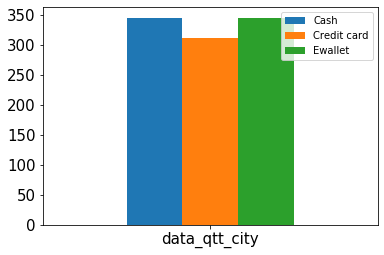

In [19]:
bar3("data_qtt_city", data_qtt_paymnt, False)

In [20]:
data.groupby('Customer type', as_index=False).Quantity.count()

,Customer type,Quantity
0,Member,501
1,Normal,499


In [21]:
data.groupby('Gender', as_index=False).Total.count()

,Gender,Total
0,Female,501
1,Male,499


In [22]:
data_total_sum = data.groupby('Gender', as_index=False).Total.sum()
data_total_sum

,Gender,Total
0,Female,167882.925
1,Male,155083.824


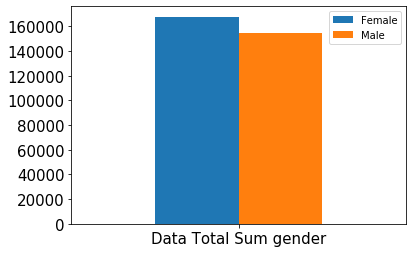

In [23]:
bar("Data Total Sum gender", data_total_sum, False)

In [24]:
data_costumrtype_total_sum = data.groupby('Customer type', as_index=False).Total.sum()
data_costumrtype_total_sum

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


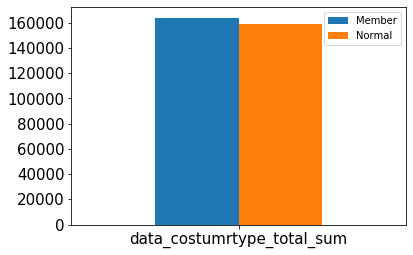

In [25]:
bar("data_costumrtype_total_sum", data_costumrtype_total_sum, False)

#### Datasets by city Naypyitaw, Mandalay, Yangon

In [26]:
data_naypyitaw = data[ data['City'] == 'Naypyitaw']
data_naypyitaw.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6
5,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,Ewallet,597.73,4.761905,29.8865,4.1
7,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,Ewallet,735.60,4.761905,36.7800,8.0
20,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,Ewallet,430.20,4.761905,21.5100,4.8
34,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,Ewallet,397.68,4.761905,19.8840,7.5


In [27]:
data_mandalay = data[ data['City'] == 'Mandalay']
data_mandalay.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
9,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,Credit card,164.52,4.761905,8.226,5.9
10,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2019-02-06,Ewallet,57.92,4.761905,2.896,4.5
11,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,2019-03-09,Cash,102.04,4.761905,5.102,6.8
15,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,2019-01-15,Cash,562.32,4.761905,28.116,4.5
19,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,Ewallet,80.60,4.761905,4.030,4.4


In [28]:
data_yangon = data[ data['City'] == 'Yangon']
data_yangon.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3
6,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,Ewallet,413.04,4.761905,20.6520,5.8


In [29]:
data = data.sort_values(by='Date')
data

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,Cash,168.96,4.761905,8.448,6.3
567,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
523,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,Ewallet,874.98,4.761905,43.749,6.0
881,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,Credit card,81.44,4.761905,4.072,9.5
963,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,Cash,290.46,4.761905,14.523,6.7
937,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,Cash,447.40,4.761905,22.370,7.4


In [30]:
dt_unique = data['Date'].unique()
citys = []

322966.74899999995

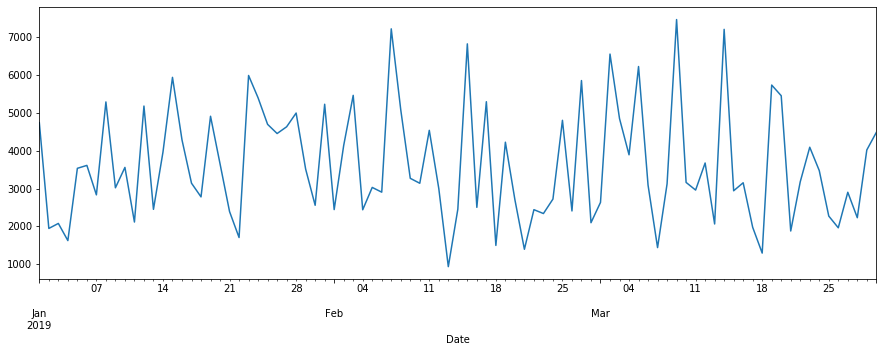

In [31]:
dt = data.groupby(data['Date'])['Total'].sum()
data.groupby(data['Date'])['Total'].sum().plot(figsize = (15,5))
dt.sum()

106197.672

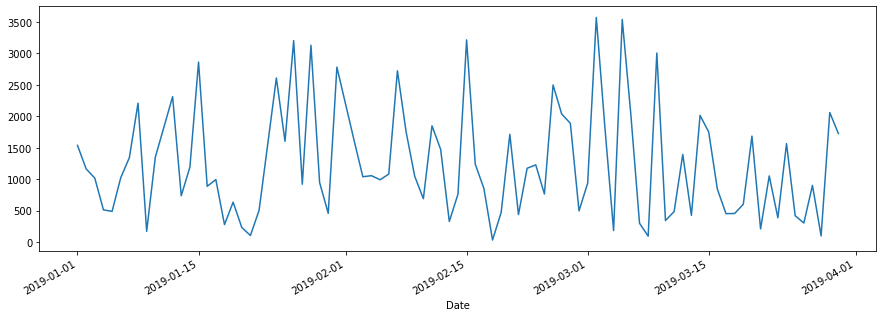

In [32]:
total_mandalay = data_mandalay.groupby(data_mandalay['Date'])['Total'].sum().sum()
citys.append(total_mandalay)
data_mandalay.groupby(data_mandalay['Date'])['Total'].sum().plot(figsize = (15,5))
total_mandalay

106200.3705

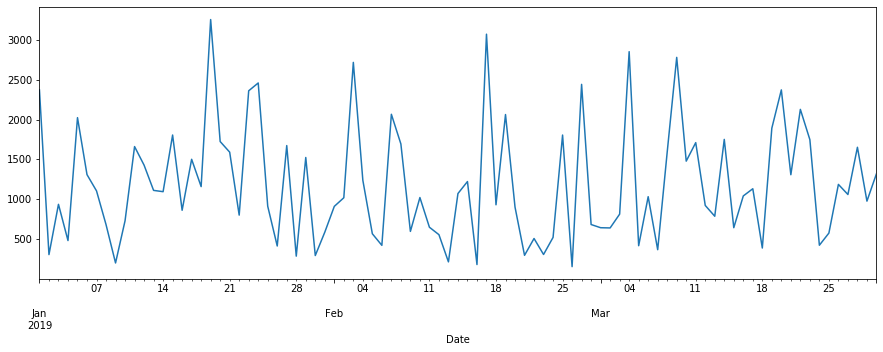

In [33]:
total_yangon = data_yangon.groupby(data_yangon['Date'])['Total'].sum().sum()
citys.append(total_yangon)
data_yangon.groupby(data_yangon['Date'])['Total'].sum().plot(figsize = (15,5))
total_yangon

110568.7065

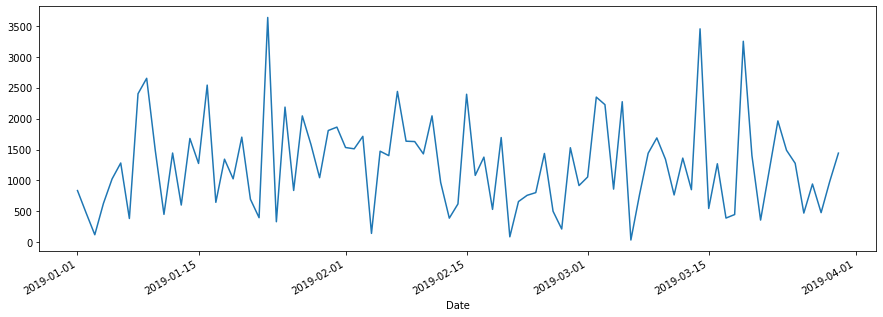

In [34]:
total_napyitaw = data_naypyitaw.groupby(data_naypyitaw['Date'])['Total'].sum().sum()
citys.append(total_napyitaw)
data_naypyitaw.groupby(data_naypyitaw['Date'])['Total'].sum().plot(figsize = (15,5))
total_napyitaw

In [35]:
citys

[106197.672, 106200.3705, 110568.7065]

In [36]:
data['City'].unique()
total_citys = dict(zip(data['City'].unique(), citys))
total_citys

{'Mandalay': 106197.672, 'Yangon': 106200.3705, 'Naypyitaw': 110568.7065}

In [37]:
dt_total_citys = pd.DataFrame.from_dict(total_citys, orient='index',
                       columns=['Total_Value_Amont'])
dt_total_citys

,Total_Value_Amont
Mandalay,106197.6720
Yangon,106200.3705
Naypyitaw,110568.7065


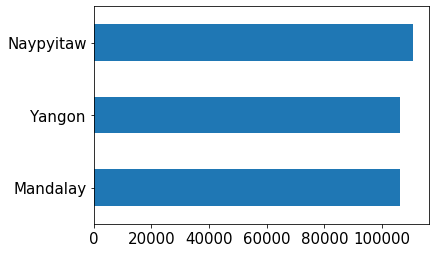

In [38]:
dt_total_citys['Total_Value_Amont'].sort_values().plot(kind='barh', fontsize = 15, logy=False)

In [39]:
data_prodline = pd.DataFrame(data['Product line'].value_counts())
data_prodline

,Product line
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


Text(0, 0.5, 'Quantity')

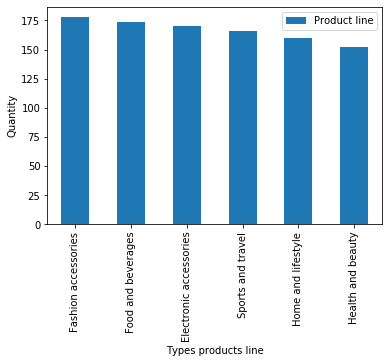

In [40]:
ax = data_prodline.plot(kind='bar', fontsize = 10)
ax.set_xlabel("Types products line")
ax.set_ylabel("Quantity")

#### Learning lambda functions with pandas

In [ ]:
list(data['Quantity'].value_counts(sort=False))[0]
pd.Series(
    map( lambda a: list(data['Quantity'].value_counts(sort=False)), range(1,11)),
    index = range(1,11)
)

#### Transform city, customer type, gender, product lin, payment in number before sns correelation

In [41]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [42]:
data_dummies = pd.get_dummies(data, columns=cat_columns, prefix=cat_columns, drop_first=True)
data_dummies.head()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
856,21.12,8,8.448,177.408,2019-01-01,168.96,4.761905,8.448,6.3,0,0,1,1,0,1,0,0,0,0,0
567,65.74,9,29.583,621.243,2019-01-01,591.66,4.761905,29.583,7.7,0,1,1,0,1,0,0,0,0,0,0
245,47.59,8,19.036,399.756,2019-01-01,380.72,4.761905,19.036,5.7,0,1,0,1,0,0,0,1,0,0,0
696,27.04,4,5.408,113.568,2019-01-01,108.16,4.761905,5.408,6.9,0,1,0,0,0,0,0,0,1,0,1
523,62.87,2,6.287,132.027,2019-01-01,125.74,4.761905,6.287,5.0,1,0,1,1,0,0,1,0,0,0,0


### Correlation features

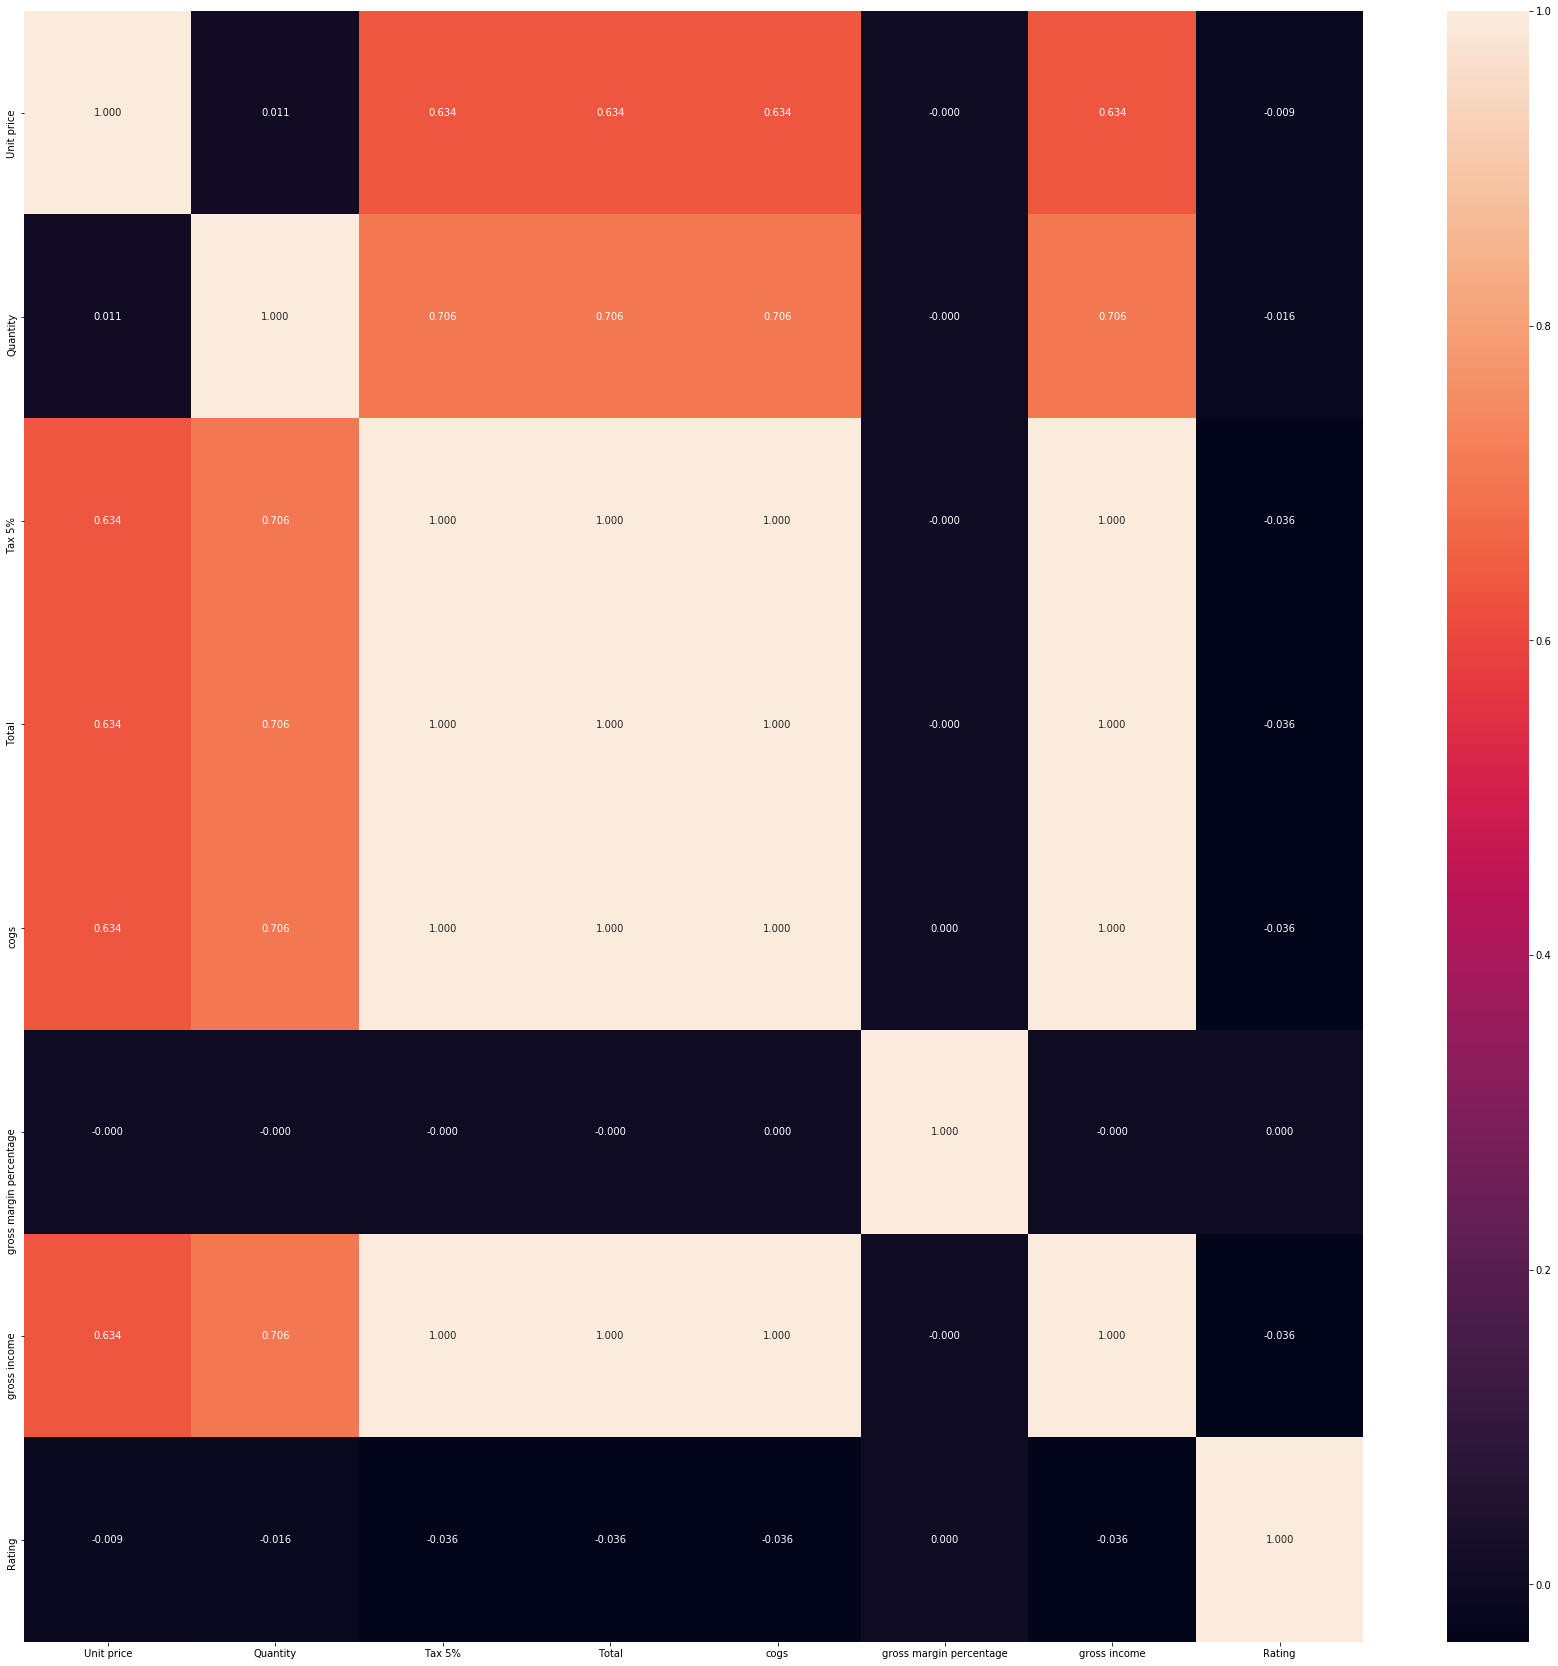

In [43]:
fig= plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt='.3f')
sns.set_style("whitegrid")
plt.show()